In [2]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [4]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [5]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [6]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 4.06 s, sys: 149 ms, total: 4.21 s
Wall time: 4.55 s


In [7]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    for suffix in "", "_tweak", "_tweak2":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger
 pairs
D_tweak
 trigger
 pairs
D_tweak2
 trigger
 pairs
C
 trigger
 pairs
C_tweak
 trigger
 pairs
C_tweak2
 trigger
 pairs
Fe
 trigger
 pairs
Fe_tweak
 trigger
 pairs
Fe_tweak2
 trigger
 pairs
Pb
 trigger
 pairs
Pb_tweak
 trigger
 pairs
Pb_tweak2
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2'])


In [8]:
for dct in dfs_mixed,dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2'])


<ipython-input-8-2bd486f10182>:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])


In [9]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

2.2 < nu <4.2 2306882  (95.91  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2306882  (100.00  %)
2.2 < nu < 4.2 2306882  (100.00  %)
secondary hadrons are pions 1392583  (60.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 1331857  (95.64  %)
kinematic limits for h2_z 1280597  (96.15  %)
kinematic limits for dphi 1279264  (99.90  %)
kinematic limits for pair_mass 1275717  (99.72  %)
leading hadrons are pions 1275717  (100.00  %)
0.2<h2_p<5.0 1164507  (91.28  %)
0.2<h1_p<5.0 1164507  (100.00  %)

key:  GiBUU_C
Entries before cut  2226123
Q2>1.0 and Q2<4.0 2225228  (99.96  %)
0.2<h1_p<5.0  2225228  (100.00  %)
inelasticity < 0.85 2225228  (100.00  %)
h1_pid = pions (trigger) 2225228  (100.00  %)
2.2 < nu <4.2 2125385  (95.51  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2125385  (100.00  %)
2.2 < nu < 4.2 2125385  (100.00  %)
secondary hadrons are pions 1198467  (56.39  %)
(h1_pid*h2_pid)<0, opposite charge pions 1091014  (91.03  %)
kinematic limits

In [10]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
0.2<h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
2.2 < nu <4.2 642836  (98.49  %)
10< h1_th 642836  (100.00  %)
Theta/P fiducial region selected for trigger hadron 642836  (100.00  %)
Nom cuts for the trigger applied 291788  (45.39  %)
 
D_C False
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
0.2<h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
2.2 < nu <4.2 863117  (98.59  %)
10< h1_th 863117  (100.00  %)
Theta/P fiducial region selected for trigger hadron 863117  (100.00  %)
Nom cuts for the trigger applied 405810  (47.02  %)
 
Fe False
Entries before cut  370123
Q2>1.0 and Q2<4.0 370122  (100.00  %)
0.2<h1_p<5.0  370122  (100.00  %)
inelasticity < 0.85 370122  (100.00  %)
h1_pid = pions (trigger) 370122  (100.00  %)
2.2 < nu <4.2 370122  (100.00  %)
10< h1_th

In [11]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mixed.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
    print(f"\n\n{key}")
    if  'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
    dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
    dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
    dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 3403326  (100.00  %)
2.2 < nu < 4.2 3361656  (98.78  %)
secondary hadrons are pions 2449421  (72.86  %)
(h1_pid*h2_pid)<0, opposite charge pions 930584  (37.99  %)
kinematic limits for h2_z 899056  (96.61  %)
kinematic limits for dphi 898616  (99.95  %)
kinematic limits for pair_mass 890515  (99.10  %)
leading hadrons are pions 890515  (100.00  %)
0.2<h2_p<5.0 890515  (100.00  %)
0.2<h1_p<5.0 890515  (100.00  %)
pt>0.07071067811865475 GeV 866977  (97.36  %)
10<h2_th 866977  (100.00  %)
Theta/P fiducial region selected for secondary hadron 816153  (94.14  %)
10< h1_th 816153  (100.00  %)
Theta/P fiducial region selected for trigger hadron 816153  (100.00  %)
Nom cuts for the pair applied (pi pi) 339912  (41.65  %)


C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2509591  (100.00  %)
2.2 < nu < 4.2 2476511  (98.68  %)
secondary hadrons are pions 1581622  (63.86  %)
(h1_pid*h2_pid)<0, opposite charge 

In [12]:
#dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
#dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# Cuts used in PRL

In [13]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [14]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [15]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'
pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")

# Single function to make S, M, C and R plots


In [16]:
#old function
def make_plots(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=False, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins=8):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    linestyles='- -- : -.'.split()
    titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
    
    systPct=5


    normalize_to_D=False
    data={}
    GiBUU={}

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    s=(', '+slicevartex) if slicevartex!=None else ''
    ylabels = {"C":f"$C(\Delta\phi{s})$",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$R(\Delta\phi{s})$"
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "SMCR"

    height = 18*(len(slicebins)-1)/4
    if slicevar is None:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if slicevar is None:
        figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(slicebins)-1, 2, 
               figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(len(slicebins)-1, 2, 
               figsize=(width,height),sharey='col', sharex='all')   
        for key in keys:
            axs[key] = [[axs[key]]]
    else:
        figs["SM"], ax = plt.subplots(len(slicebins)-1, 2, 
               figsize=(width,height),sharey='col', sharex='all')
        axs["S"] = [[ax[k][0]] for k in range(len(ax))]
        axs["M"] = [[ax[k][1]] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(len(slicebins)-1, 2, 
               figsize=(width,height),sharey='col', sharex='all')   
        axs["C"] = [[ax[k][0]] for k in range(len(ax))]
        axs["R"] = [[ax[k][1]] for k in range(len(ax))]
    
#     for key in keys:
#         if slicevar == None:
#             axs[key] = [axs[key]]
#         if dropLeadPiMinus:
#             axs[key] = [[a] for a in axs[key]]
    artists = []
    maxC=0.05
    maxR=0.05
    for j in range(2 if not dropLeadPiMinus else 1):
        pid = pids[j]
        for k in range(len(slicebins)-1):
            if k == len(slicebins)-2:
                for key in "CRSM":
                    axs[key][k][0].set_xlabel("$\\Delta\phi$ [rad]")
                    axs[key][k][0].set_xlabel("$\\Delta\phi$ [rad]")
            slice_range=slicebins[k:k+2]
            linestyles='- -- : -.'.split()
            colors='k tab:blue tab:orange tab:green'.split()
            markers='*vos'
            integral_data_D = 0
            integral_GiBUU_D = 0
            data_D=None
            stat_D=None
            GiBUU_D=None
            if usePRLcuts: #use separate calculation for D data gained with each
                           #nuclear target, just like in the PRL
                Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
            else:
                Alist = enumerate("D C Fe Pb".split())
            for i, A in Alist:

                # leave blank the panels with crappy statistics
                if slicevar=='drap' and (j == 0 and k == 0 or j == 1 and k==3) and not dropLeadPiMinus:
                    continue
                    
                if slicevar=='h1_cm_pt' and (j == 1 and k == 0) and not dropLeadPiMinus:
                    continue

                q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                     f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
                if usePRLcuts:
                    #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                    #so we need this in order to make the comparison
                    q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 
                
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                
                
                which_set = "D_Pb" if A=="D" and usePRLcuts else A
                #which_set=A
                
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                shift = 0.1*(bins[1]-bins[0])*(i-1.5)
                N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5"
                N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

                qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
                if usePRLcuts:
                    qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom
                
                N1 = len(dfs_trigger[which_set].query(qtrig))

                x = (x[1:]+x[:-1])/2
                dx = x[1]-x[0]

                S = N2/dx/N1/2
                dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

                M = N2mix/(sum(N2mix)/len(N2mix))
                dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
                
                M_err = np.sqrt(np.mean((M-1)**2))/2
                print((A,pid,k),"estimated syst error from event mixing",  M_err)

                C = S/M
                dCstat = dSstat/M

                if i >= 0: # skip D_ stuff when comparing to PRL results
                    arg = dict(color=colors[i], marker=markers[i], linestyle='',
                              capsize=3)

                    axs['S'][k][j].errorbar(x+shift, S,dSstat, **arg, label=A)
                    axs['S'][k][j].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

                    axs['M'][k][j].errorbar(x+shift, M,dMstat, **arg, label=A)
                    axs['M'][k][j].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



                if A=="D" or "D_" in A:  
                    integral_data_D=sum(C)*dx*2
                    
                

                dCsyst = np.hypot(C*systPct/100, C*dMstat)
                C/=integral_data_D
                dCstat/=integral_data_D
                dCsyst/=integral_data_D
                
                if A=='D' or "D_" in A:
                    data_D=C
                    stat_D=dCstat
                
                R_data = C/data_D
                if i >= 0: # skip D_ stuff when comparing to PRL results
                    artists.append(axs['C'][k][j].errorbar(x+shift, C,dCstat, **arg, label=A))
                    axs['C'][k][j].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
                    arg['capsize']=0
                    dCtot = np.hypot(dCstat, dCsyst)
                    axs['C'][k][j].errorbar(x+shift,C, dCtot, **arg)
                    axs['C'][k][j].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
                    if A!="D":
                        axs['R'][k][j].errorbar(x+shift,R_data, 
                                            C/data_D*np.hypot(dCstat/C, stat_D/data_D),
                                            **arg)
                
                
                data[(A, pid,k)] = dict(y=C, dystat=dCstat, dysyst=dCsyst, 
                                                bins=bins, slice_range=slice_range, 
                                       slicevartex=slicevartex)
                if "D_" in A:
                    continue
                    
                #GiBUU
                q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"
                shift = 0.2*(bins[1]-bins[0])*(i-1.5)
                
                N2, _ = np.histogram(dfs_pair[f"GiBUU_{A}"].query(q)['dphi'], bins=bins)


                qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig
                N1 = len(dfs_trigger["GiBUU_"+A].query(qtrig))
                y = N2/N1/dx/2
                
                print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2
                    
                y/=integral_GiBUU_D
                
                GiBUU[(A, pid,k)] = dict(y=y, 
                                                bins=bins, slice_range=slice_range)
                arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])

                x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
                y = list(y)+ list(reversed(list(y)))
                
                
                
                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D
                if i >= 0: # skip D_ stuff when comparing to PRL results
                    artists.append(axs['C'][k][j].plot(x, y, **arg, label=f"GiBUU {A}")[0])
                    if A!="D":
                        axs['R'][k][j].plot(x, R_GiBUU, **arg, label=f"GiBUU {A}")
                
                if (max(C)>maxC):
                    maxC=max(C)
                if max(y)>maxC:
                    maxC = max(y)
                if max(R_data)>maxR:
                    maxR = max(R_data)
                if max(R_GiBUU)>maxR:
                    maxR = max(R_GiBUU)
                
                axs["C"][k][j].set_ylim(0, 1.1*maxC)
                axs["R"][k][j].set_ylim(0, 1.1*maxR)
            for key in keys:
                if key in "MR":
                    cuts_txt="$1<Q^2<4$ GeV$^2$\n$W>2$ GeV\n"+\
                          "$2.3<\\nu<4.2$ GeV\n"+\
                          "$0.5<z_1<1.0$\n"+\
                          "$0.05<z_2<0.45$\n"+\
                          ("$p^T>0.250$ GeV\n" if not usePRLcuts else "$p^T>0.0707$ GeV\n")

                    if j == 0 and k == 0 and slicevar=='drap' :
                        axs[key][k][j].text(0.05,0.1, cuts_txt,
                                    transform=axs[key][k][j].transAxes)
                    elif slicevar is None:
                        axs[key][k][j].text(0.67,0.6, cuts_txt,
                                    transform=axs[key][k][j].transAxes)
                    elif j == 0 and k == 0  and slicevar!='drap':
                        axs[key][k][j].text(0.05,0.5, cuts_txt,
                                    transform=axs[key][k][j].transAxes)
                
                #else :
                #    axs[key][k][j].text(0.05,0.1, cuts_txt
                #                transform=axs[key][k][j].transAxes)
                if slicevar != None:    
                    axs[key][k][j].text(0.7,0.85,
                                   f"${slice_range[0]:.2f}<{slicevartex}<{slice_range[1]:.2f}$",
                                  transform=axs[key][k][j].transAxes)
                if j==0:
                    axs[key][k][j].set_ylabel(ylabels[key])

                if k ==0 and j == 0: 
                    if key == "C":
                        a=[artists[i] for i in [0,2,4,6,1,3,5,7]]
                        l=[aa.get_label() for aa in a]
                        #split legend, with data on one side and GiBUU on the other
                        plt.sca(axs[key][(k+1) if slicevar is not None else k][j])
                        legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                    loc='upper left' if slicevar is not None else "upper right",
                                             ncol=1)
                        axs[key][k][j].legend(a[:4], l[:4], framealpha=0,
                                           loc='upper left',ncol=1)
                        axs[key][(k+1) if slicevar is not None else k][j].add_artist(legend2)
                    elif key == "S": 
                        a=[artists[i] for i in [0,2,4,6]]
                        l=[aa.get_label() for aa in a]
                        axs[key][k][j].legend(a[:4], l[:4], framealpha=0,
                                           loc='upper left',ncol=1)
                    #axs[key][k][j].set_ylabel("")
                #plt.gca().set_ylim(0,0.155)
                        #plt.gca().set_ylim(0)
                if k == 0 and not dropLeadPiMinus and not usePRLcuts:
                    axs[key][k][j].set_title(titles[j])
                axs[key][k][j].set_xlim(0,2*np.pi)

                
    PRL={"C":[1.019, .962, .976, .944, .876, .841, .812, .789],
         "Fe":[.968, .908, .895, .890, .775, .724, .705, .671],
         "Pb":[.944, .878, .878, .827, .802, .675, .611, .620]}
    x= np.linspace(0, np.pi, 9)
    x = (x[:-1]+x[1:])/2
    for a in PRL.keys():
        axs["R"][0][0].plot(x, PRL[a], marker='x', linestyle='')
    for key in "CR SM".split():
        figs[key].suptitle(suptitle)
        figs[key].tight_layout()
        if saveFig:
            figs[key].savefig(f"images/{key}_charge_{slicevar}.pdf")
            figs[key].savefig(f"images/{key}_charge_{slicevar}.png")
        figs[key].show()
    return data, GiBUU

('D', 211, 0) estimated syst error from event mixing 0.0443021902888271
1971713 [ 42771  46724  55203  73870 110424 168125 228979 272407]
('D_C', 211, 0) estimated syst error from event mixing 0.0443021902888271
('C', 211, 0) estimated syst error from event mixing 0.0443021902888271
1936249 [ 42442  46262  54171  70000 102046 147557 197280 228661]
('D_Fe', 211, 0) estimated syst error from event mixing 0.0443021902888271
('Fe', 211, 0) estimated syst error from event mixing 0.0443021902888271
841499 [18102 19440 22473 29147 41026 58695 76571 87694]
('D_Pb', 211, 0) estimated syst error from event mixing 0.0443021902888271
('Pb', 211, 0) estimated syst error from event mixing 0.0443021902888271
961024 [21192 22647 26335 33318 46337 65144 83862 96150]


<ipython-input-16-46b5f024ba25>:311: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


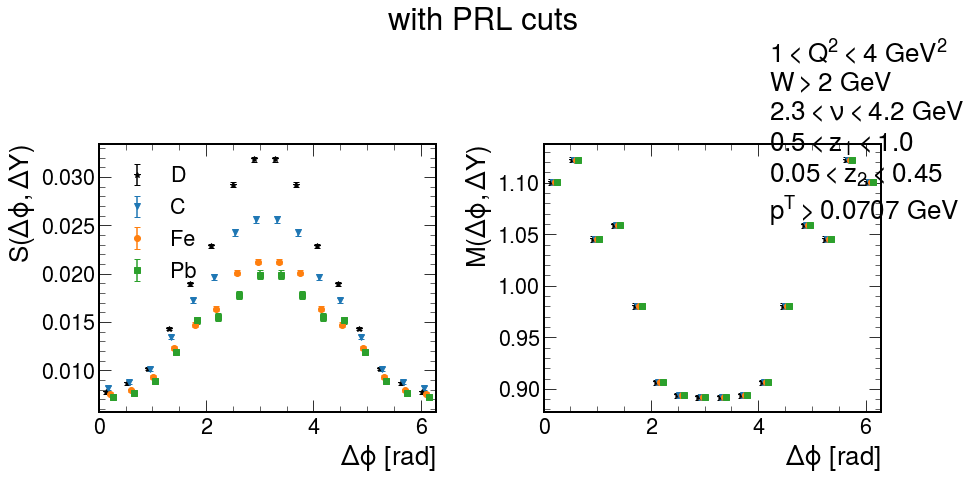

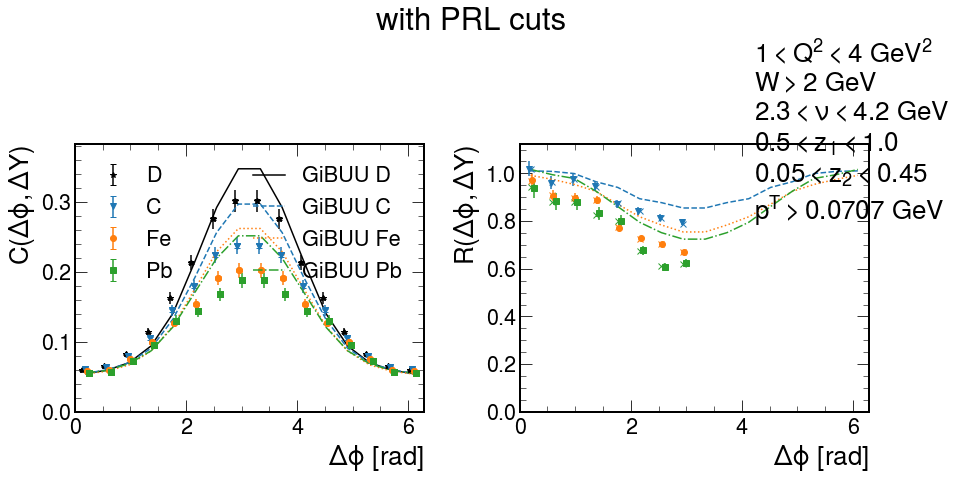

In [17]:
#PRL cuts
data, GiBUU = make_plots(None, usePRLcuts=True,suptitle="with PRL cuts")
#all_data['PRL']=data
#all_GiBUU['PRL']=GiBUU

In [18]:
def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]

In [19]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, GiBUU_suffix=""):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=3
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
        else:
            Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"


            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            if usePRLcuts:
                q = "h2_z>0.05 and h1_z>0.5"
            N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom

            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            M = N2mix/(sum(N2mix)/len(N2mix))
            dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)

            C = S/M
            dCstat = dSstat/M
            
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = np.hypot(C*systPct/100, C*dMstat)
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, M=M, dSstat=dSstat, dMstat=dMstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, M_alt=M_alt))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            integral_GiBUU_D = 0
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):
            
                nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+GiBUU_suffix].query(q)['dphi'], bins=bins)

                x = (x[1:]+x[:-1])/2
                dx =x[1]-x[0]

                qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                N1 = len(dfs_trigger["GiBUU_"+A+GiBUU_suffix].query(qtrig))
                y = N2/N1/dx/2
                #print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2

                y/=integral_GiBUU_D

                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D

                tmp = A + "_fine" if useFinerBinning else A
                GiBUU[k][tmp] = pd.DataFrame(dict(C=y, R=y/GiBUU_D,
                                                phi=x, 
                                                 phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [70]:
def make_plots_new(data, GiBUU, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "SMCR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        axs["S"] = [ax[k][0] for k in range(len(ax))]
        axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CRSM":    
            if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
                axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[1]-x[0])*(i-1.5)
            
            S = data[k][A].S
            M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            dSstat = data[k][A].dSstat
            dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)

            axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
        Alist = enumerate("D C Fe Pb".split())
        #granulatir
        for i, A in Alist:
            y = GiBUU[k][A+"_fine"].C
            
            arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])

            
            x= GiBUU[k][A+"_fine"].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            
            artists.append(axs['C'][k].plot(x, y, **arg, label=f"GiBUU {A}")[0])
            
            
            x= GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            R_GiBUU = GiBUU[k][A].R
            
            if A!="D":
                axs['R'][k].plot(x, list(R_GiBUU)+list(reversed(R_GiBUU)), **arg, label=f"GiBUU {A}")

            if (max(C)>maxC):
                maxC=max(C)
            if max(y)>maxC:
                maxC = max(y)
            if max(R_data)>maxR:
                maxR = max(R_data)
            if max(R_GiBUU)>maxR:
                maxR = max(R_GiBUU)

            axs["C"][k].set_ylim(0, maxC*(1.1 if len(sliceinfo) == 1 else 1.3))
            axs["R"][k].set_ylim(0, 1.3*maxR)
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.42, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            if len(sliceinfo)!=1 and key in "SM":    
                axs[key][k].text(0.5,0.9,
                               sliceinfo[k],
                              transform=axs[key][k].transAxes,
                                 horizontalalignment='center',
                                 fontsize=fontsize)
            elif len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k],
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                elif key == "S": 
                    #a=[artists[i] for i in [0,2,4,6]]
                    a=[artists[i] for i in [0,1,2,3]]
                    l=[aa.get_label() for aa in a]
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ax in axs['R']:
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
    for key in "CR SM".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    figs["CR"].savefig(f"/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/corr_{filename_tag}.pdf")

In [71]:
import copy
def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    
    newIntegral =2*dx*sum(yDcorr)
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    return data_corr

In [72]:
import pickle

with open('syst_from_misid.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_misid = pickle.load(f)
def add_syst_error_from_misid(data, key):
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,syst_from_misid[key][i]*data[i][A].C)

In [73]:
def add_syst_from_mixing(data):
    for j in range(len(data)):
        for A in "D C Fe Pb".split():
            df = data[j][A]
            add_syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
            df.dCsyst=np.hypot(df.dCsyst, add_syst*df.C)

In [74]:
all_data_uncorr={}
all_data={}
all_GiBUU={}
all_sliceinfo={}

1.0
0.9999999999999999


<ipython-input-70-085549b0050a>:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


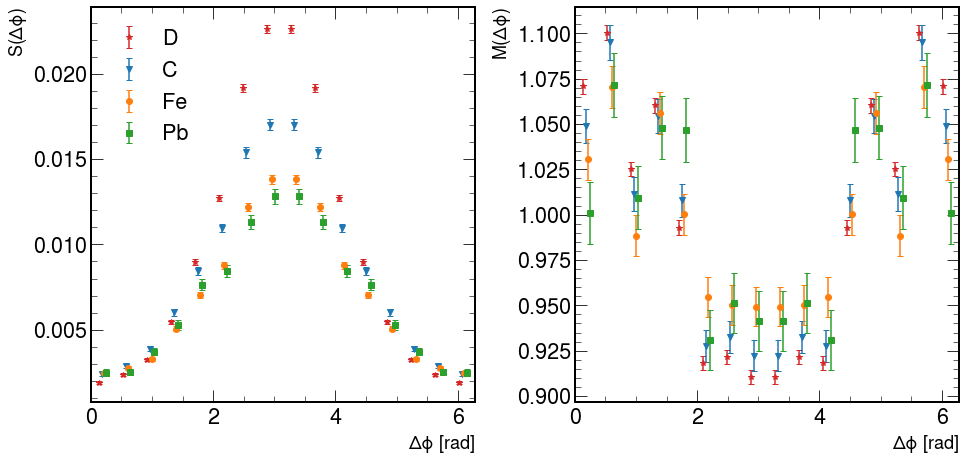

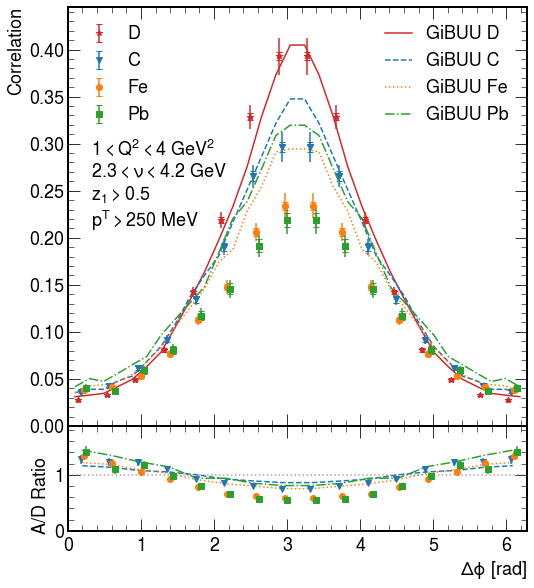

In [75]:
data, GiBUU, sliceinfo = get_values(None,  pThetaCutsGiBUU=True,GiBUU_suffix='_tweak2')
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'all')
add_syst_from_mixing(data_corr)
all_data_uncorr['all']=data
all_data['all']=data_corr
all_GiBUU['all']=GiBUU
print(sum(all_GiBUU['all'][0]['D_fine'].C)*2*np.pi/16)
print(sum(all_data['all'][0]['D'].C)*2*np.pi/8)

#replace the D calculations with the tweaked
#GiBUU[0]['D']=GiBUU[0]['D_tweak']
all_sliceinfo['all'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag="all")

0    0.097350
1    0.034281
2    0.033299
3    0.032956
4    0.033458
5    0.034390
6    0.033996
7    0.035605
dtype: float64


<ipython-input-70-085549b0050a>:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


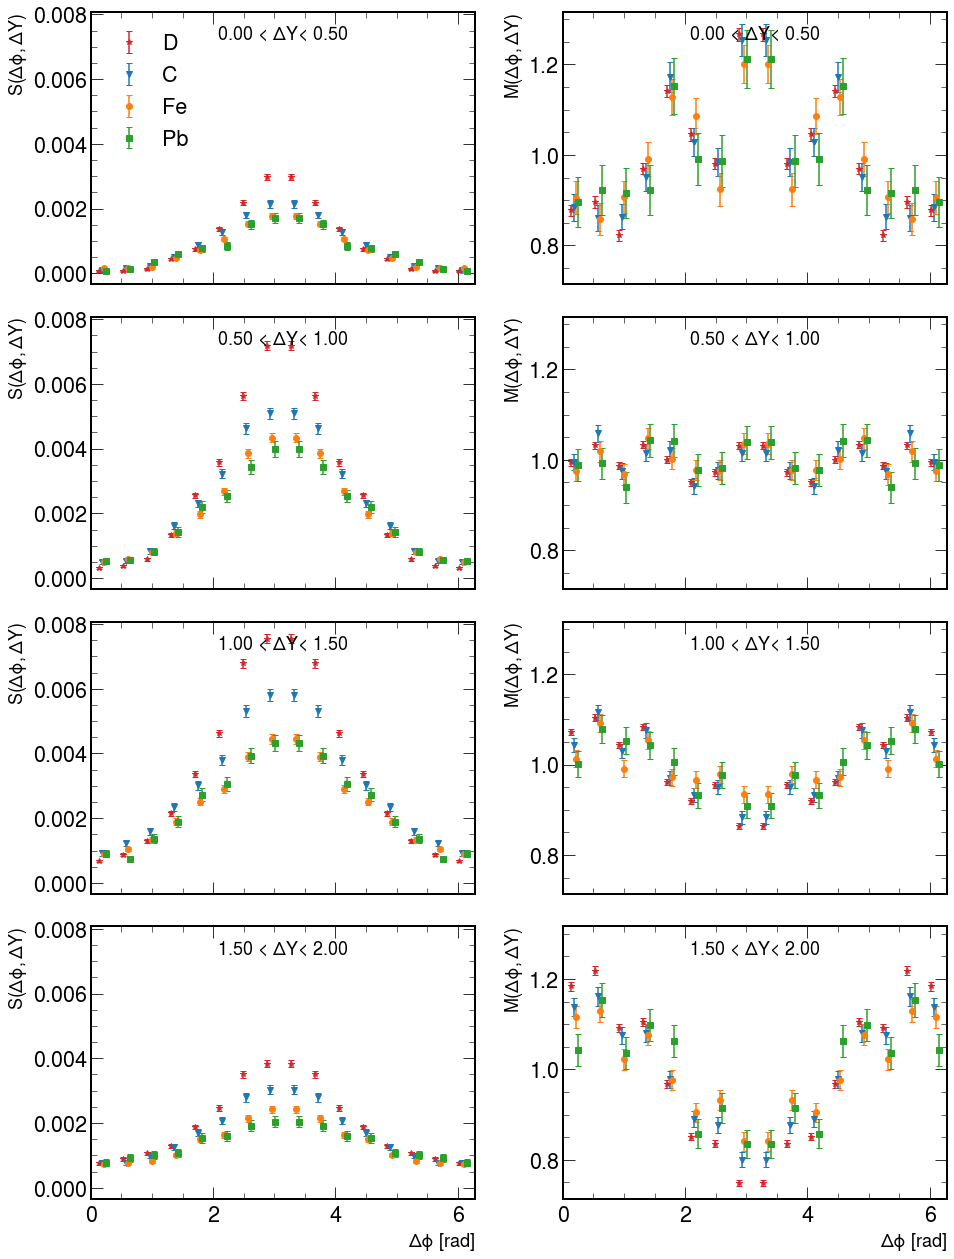

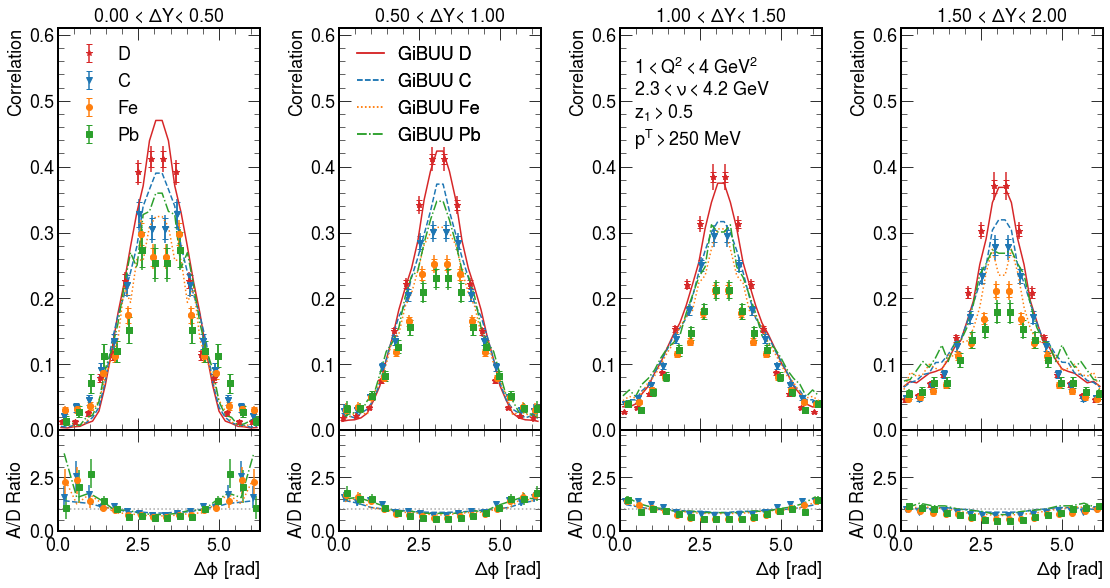

In [76]:
data, GiBUU, sliceinfo = get_values("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0),GiBUU_suffix='_tweak2')
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'dY')
all_data_uncorr['dY']=data
all_data['dY']=data_corr
all_GiBUU['dY']=GiBUU
all_sliceinfo['dY'] = sliceinfo

print(data_corr[0]['D'].dCsyst/data_corr[0]['D'].C)
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='dY')

<ipython-input-70-085549b0050a>:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


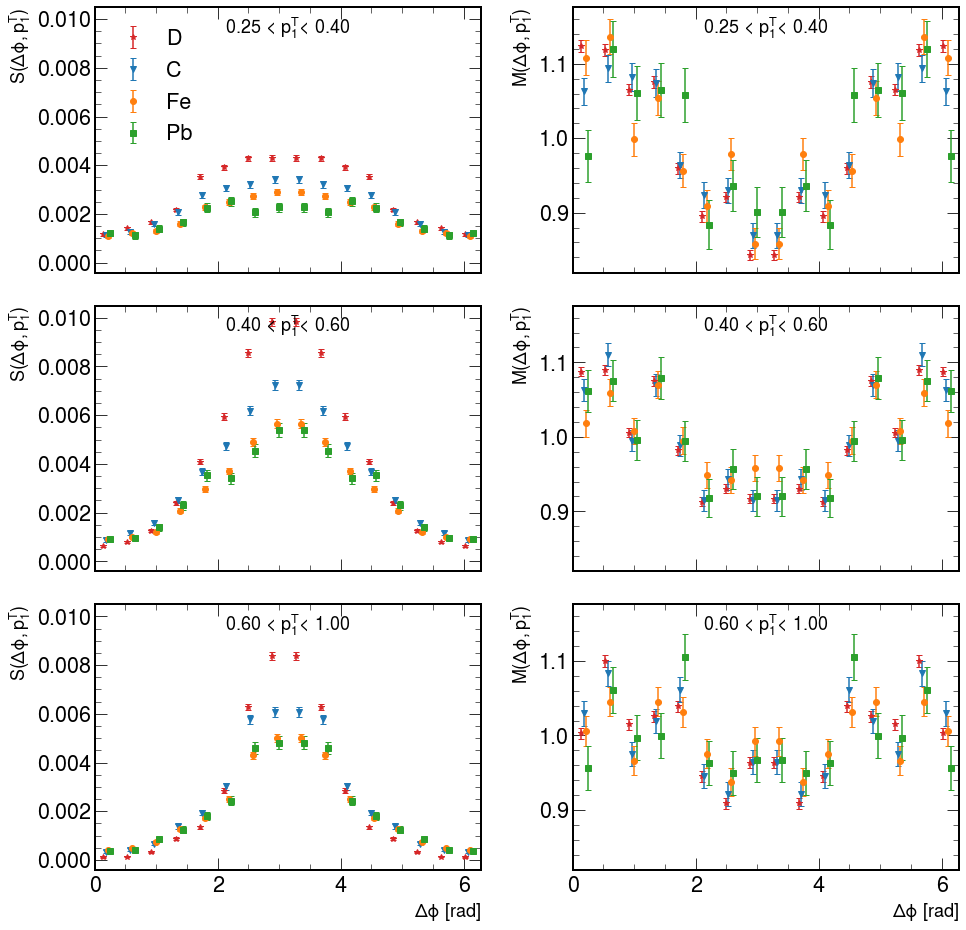

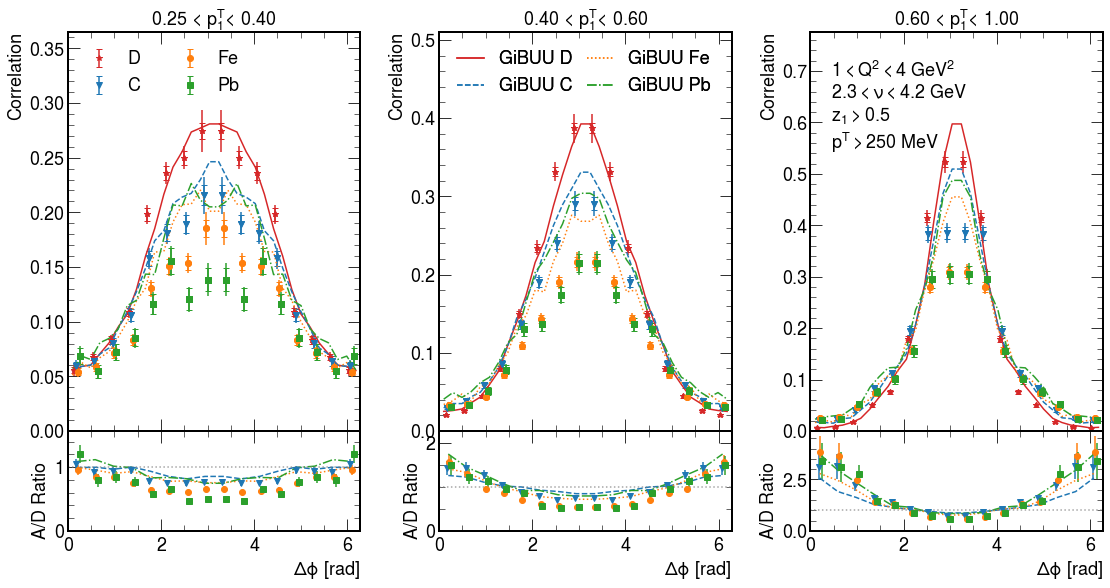

In [77]:
data, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),
                                    GiBUU_suffix='_tweak2')
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT1')
all_data_uncorr['pT1']=data
all_data['pT1']=data_corr
all_GiBUU['pT1']=GiBUU
all_sliceinfo['pT1'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT1')

<ipython-input-70-085549b0050a>:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


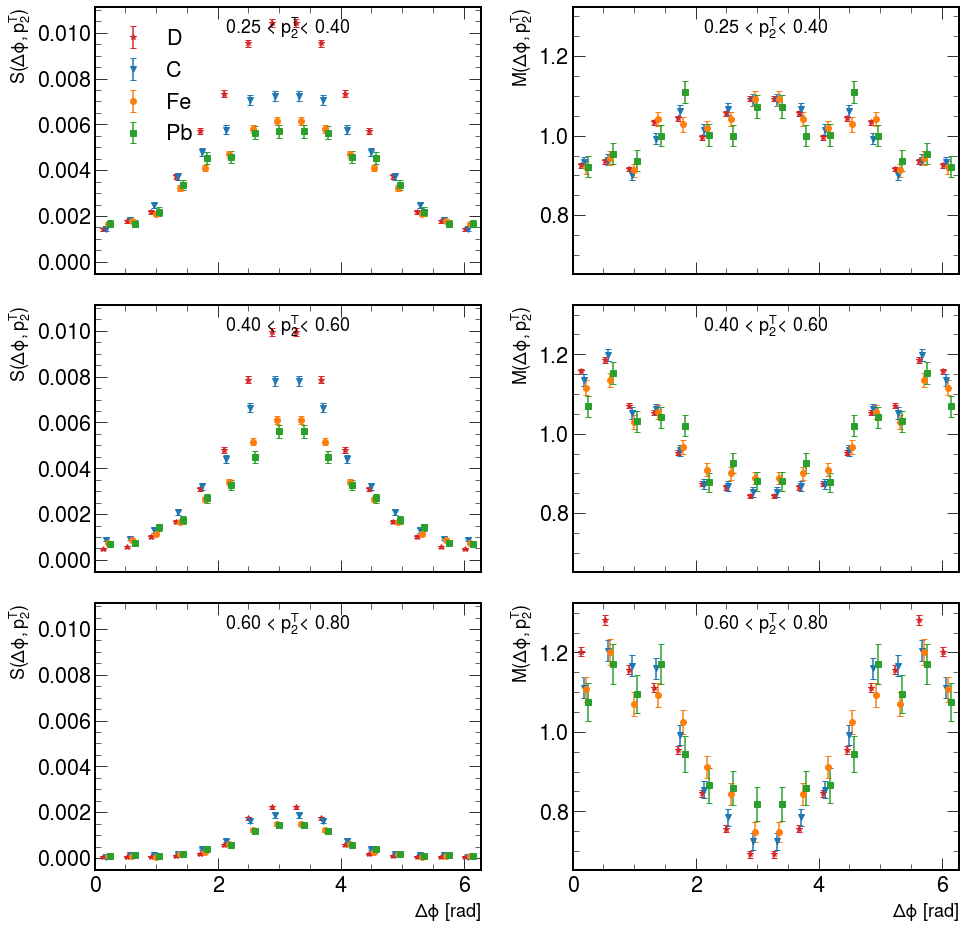

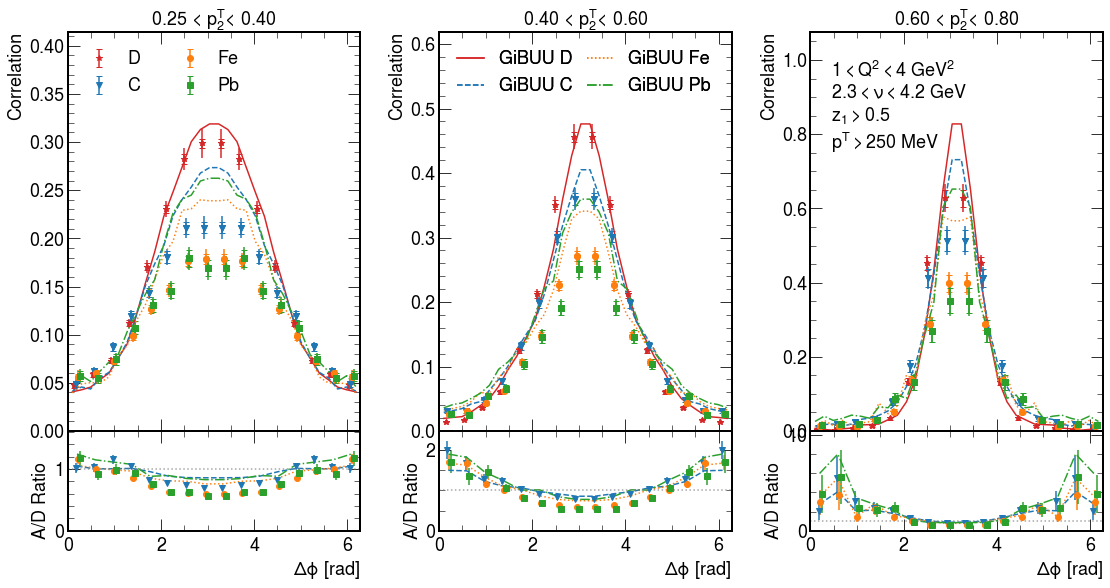

In [78]:
data, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),
                                    GiBUU_suffix='_tweak2')
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT2')
all_data_uncorr['pT2']=data
all_data['pT2']=data_corr
all_GiBUU['pT2']=GiBUU
all_sliceinfo['pT2'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT2')

In [29]:
_, all_GiBUU['dY_fine'], all_sliceinfo['dY_fine'] = get_values("drap", "\Delta Y", (0,.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2.0))
_, all_GiBUU['pT1_fine'], all_sliceinfo['pT1_fine'] = get_values("h1_cm_pt", "p^T_{1}", (0.25,0.3, 0.4,0.5, 0.6,.8, 1))
_, all_GiBUU['pT2_fine'], all_sliceinfo['pT2_fine'] = get_values("h2_cm_pt", "p^T_{2}", (0.25,0.3, 0.4,.5,0.6,.7, 0.8))

<ipython-input-19-c65ca5ef2829>:98: RuntimeWarning: invalid value encountered in true_divide
  dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)


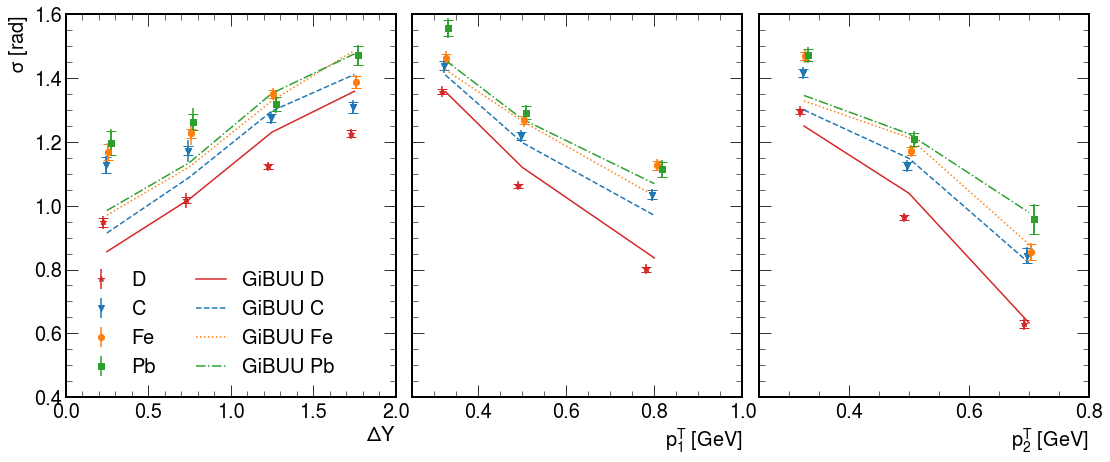

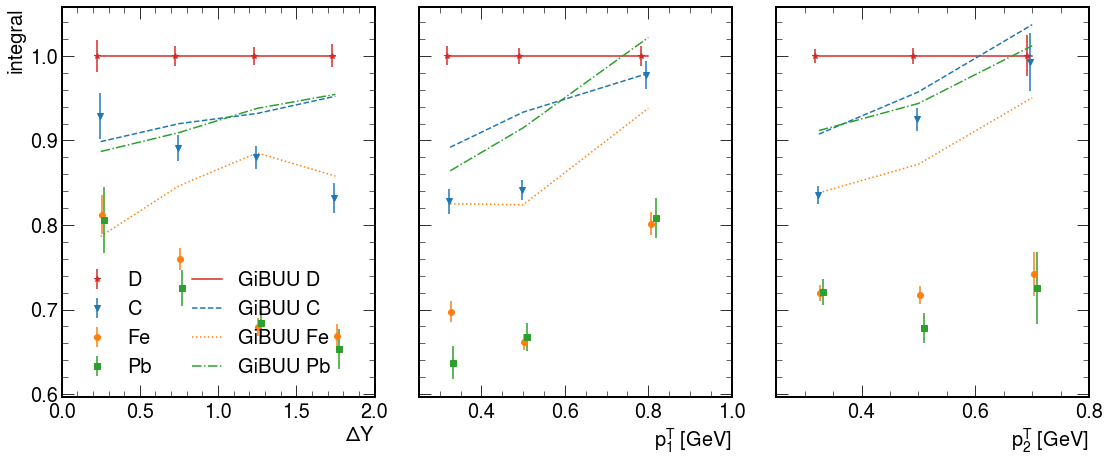

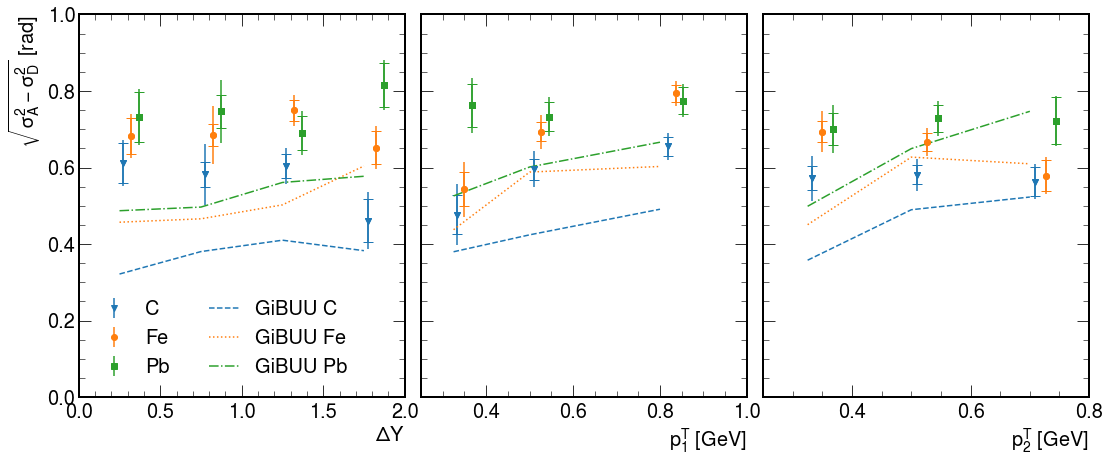

In [79]:
figs = {}
axs = {}

fontsize=20
data_widths={}
GiBUU_widths={}

dphi_res=.02 # from single-pion note

sys_from_resolution = lambda width : width-np.sqrt(width**2-dphi_res**2)
#approximate systematic error due to the finite binwidth
sys_from_finite_binwidth = lambda width : abs(1.8 -width)*.01

sys_tot_width= lambda width: np.hypot(sys_from_resolution(width), sys_from_finite_binwidth(width))

statkeys = 'widths', 'integrals', 'diffwidths'
for key in statkeys:
    fig, ax= plt.subplots(1,3, figsize=(16, 7), sharey='all')
    figs[key] = fig; axs[key] = ax 
    
    
titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
    
varkeys='dY pT1 pT2'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

for i in range(3):
    key = varkeys[i]
    xlim = float(all_sliceinfo[key][0].split("<")[0]),\
           float(all_sliceinfo[key][len(all_sliceinfo[key])-1].split("<")[2])
    
    for a in axs.values():
        a[i].set_xlim(xlim)
    
    for j in range(1):
    #for j in range(2):
        pid = [211,-211][j]
        #if i == 0:
        #    plt.title(titles[j])
        axs['integrals'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
        axs['widths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
        axs['diffwidths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
        
        for k in range(4):
            A = "D C Fe Pb".split()[k]
            widths=[]
            dwidths_stat=[]
            dwidths_tot = []
            integrals=[]
            dintegrals=[]
            xs=[]
            for l in range(len(all_data[key])):
                df = all_data[key][l][A]
                
                y = df.C
                dystat = df.dCstat
                dytot= np.hypot(df.dCstat, df.dCsyst)
                phi=df.phi
                #print(y, dy, phi)
                binwidth=(-phi[:-1]+phi[1:])
                #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
                width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
                widths.append(width)
                sum_y = np.sum(y)
                #sum_dy2=np.sum(dy**2)
                dwidth_stat=np.sqrt(sum(dystat**2*(((phi-np.pi)**2-width**2)/sum_y)**2))/(2*width)
                dwidths_stat.append(dwidth_stat)
                
                dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
                                    + sys_tot_width(width)**2)
                
                dwidths_tot.append(dwidth_tot)

                binwidth=phi[1]-phi[0]
                integrals.append(sum(y)*binwidth*2)
                dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

                r= all_sliceinfo[key][l].split('<')
                r = float(r[0]), float(r[2])
                shift = (r[1]-r[0])*(k-1.5)*.03
                xs.append((r[0]+r[1])/2+shift)
            
            #print(widths)
                    
                    
            a=axs['widths'][i].errorbar(xs, widths, dwidths_stat, color=colors[k], marker=markers[k],
                        linestyle='', label =A, capsize=5)
            a=axs['widths'][i].errorbar(xs, widths, dwidths_tot, color=colors[k], marker=markers[k],
                        linestyle='', label =None, capsize=0)
            if i == 0:
                artists.append(a)
                labels.append(A)
            axs['integrals'][i].errorbar(xs, integrals, dintegrals, color=colors[k], marker=markers[k],
                        linestyle='', label =A)
            
            data_widths[A, key] = {"xs":xs, "widths":widths, "dwidths_stat": dwidths_stat,
                                  "dwidths_tot": dwidths_tot}
            
            #same for GiBUU:
            widths=[]
            xs_GiBUU=[]
            integrals=[]
            #suffix="_fine"
            suffix=""
            for l in range(len(all_GiBUU[key+suffix])):
                
                df=all_GiBUU[key+suffix][l][A]
                y = df.C
                phi=df.phi
                binwidth=(-phi[:-1]+phi[1:])
                width=np.sqrt(sum(y*(phi-np.pi)**2)/sum(y))
                widths.append(width)

                binwidth=phi[1]-phi[0]
                integrals.append(sum(y)*binwidth*2)
                #dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

                r= all_sliceinfo[key+suffix][l].split('<')
                r = float(r[0]), float(r[2])
                xs_GiBUU.append((r[0]+r[1])/2)
            a=axs['widths'][i].plot(xs_GiBUU, widths, color=colors[k],
                        linestyle=linestyles[k], label ="GiBUU "+A)
            
            GiBUU_widths[A, key] = {"xs": xs, "widths":widths}
            if i == 0:
                artists.append(a[0])
                labels.append("GiBUU "+A)
            axs['integrals'][i].plot(xs_GiBUU, integrals, color=colors[k],
                        linestyle=linestyles[k], label ="GiBUU_"+A)
        for k in range(1,4):
            A = "D C Fe Pb".split()[k]
            xs_shift = np.add(xs, (xs[1]-xs[0])*.1*(k-1))
            #axs['diffwidths'][i].plot(xs, np.subtract(GiBUU_widths[A,key]['widths'],GiBUU_widths["D",key]['widths']), color=colors[k],
            #            linestyle=linestyles[k])
            #axs['diffwidths'][i].errorbar(xs_shift, np.subtract(data_widths[A,key]['widths'],data_widths["D",key]['widths']), 
            #                              np.hypot(data_widths[A,key]['dwidths'],data_widths["D",key]['dwidths']), color=colors[k], marker=markers[k],
            #            linestyle='', label =A, capsize=5)
            
            g_A=pd.Series(GiBUU_widths[A,key]['widths'])
            g_D=pd.Series(GiBUU_widths["D",key]['widths'])
            axs['diffwidths'][i].plot(xs_GiBUU, np.sqrt(g_A**2-g_D**2), color=colors[k],
                        linestyle=linestyles[k])
            
            d_A = pd.Series(data_widths[A,key]['widths'])
            d_D = pd.Series(data_widths["D",key]['widths'])
            
            ds_A = pd.Series(data_widths[A,key]['dwidths_stat'])
            ds_D = pd.Series(data_widths["D",key]['dwidths_stat'])
            
            y = np.sqrt(d_A**2-d_D**2)
            axs['diffwidths'][i].errorbar(xs_shift, y, 
                                          np.hypot(d_A*ds_A,d_D*ds_D)/y, color=colors[k], marker=markers[k],
                        linestyle='', label =A, capsize=5)
            ds_A = pd.Series(data_widths[A,key]['dwidths_tot'])
            ds_D = pd.Series(data_widths["D",key]['dwidths_tot'])
            axs['diffwidths'][i].errorbar(xs_shift, y, 
                                          np.hypot(d_A*ds_A,d_D*ds_D)/y, color=colors[k], marker=markers[k],
                                linestyle='', label =None, capsize=0)
            
            axs['diffwidths'][i].set_ylim(0, 1)
axs['widths'][0].set_ylabel("$\sigma$ [rad]", fontsize=fontsize)
axs['diffwidths'][0].set_ylabel("$\\sqrt{\\sigma^2_A-\\sigma^2_D}$ [rad]", fontsize=fontsize)
axs['integrals'][0].set_ylabel("integral", fontsize=fontsize)

for axlist in axs['widths'], axs['diffwidths'], axs['integrals']:
    for ax in axlist:
        ax.tick_params(axis='both', labelsize=fontsize)

indices = [0,2,4, 6, 1,3, 5,7]
axs['widths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)

axs['widths'][0].set_ylim(0.4, 1.6)
axs['integrals'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)
indices = [2,4, 6, 3, 5,7]
axs['diffwidths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)


figs['widths'].tight_layout()
figs['widths'].subplots_adjust(wspace=0.05)
figs['diffwidths'].tight_layout()
figs['diffwidths'].subplots_adjust(wspace=0.05)
figs['integrals'].tight_layout()
plotdir='/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/'
figs['widths'].savefig(plotdir+"/widths.pdf")
figs['diffwidths'].savefig(plotdir+"/diffwidths.pdf")
plt.show()

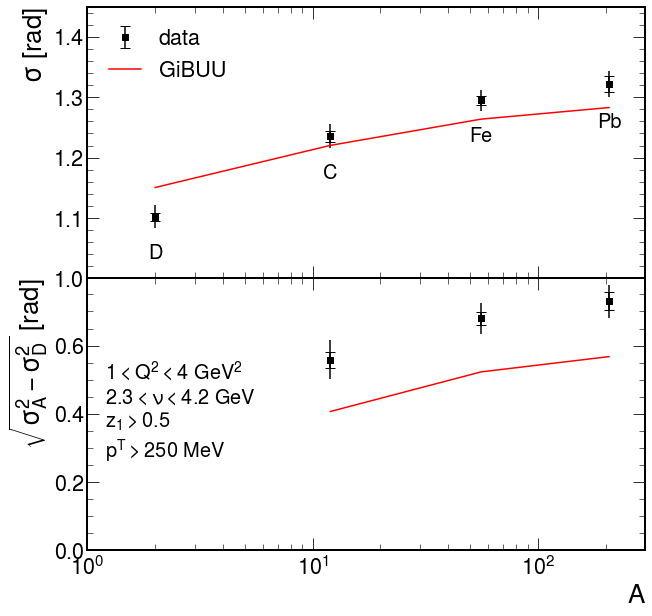

In [119]:
fig, axs=plt.subplots(2,1, sharex='all')

fontsize=20
data_widths={}
GiBUU_widths={}

dphi_res=.02 # from single-pion note

sys_from_resolution = lambda width : width-np.sqrt(width**2-dphi_res**2)
#approximate systematic error due to the finite binwidth
sys_from_finite_binwidth = lambda width : abs(1.8 -width)*.01

sys_tot_width= lambda width: np.hypot(sys_from_resolution(width), sys_from_finite_binwidth(width))


varkeys='all'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

key = 'all'

As=[2,12, 56, 207]
widths=[]
dwidths_stat=[]
dwidths_tot = []


widths_GiBUU=[]
for k in range(4):

    A = "D C Fe Pb".split()[k]
    xs=[]
    l=0 #there is only one slice
    df = all_data[key][l][A]
    y = df.C
    dystat = df.dCstat
    dytot= np.hypot(df.dCstat, df.dCsyst)
    phi=df.phi
    #print(y, dy, phi)
    binwidth=(-phi[:-1]+phi[1:])
    #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
    width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
    widths.append(width)
    #sum_dy2=np.sum(dy**2)
    dwidth_stat=np.sqrt(sum(dystat**2*(((phi-np.pi)**2-width**2)/sum_y)**2))/(2*width)
    dwidths_stat.append(dwidth_stat)

    dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
                        + sys_tot_width(width)**2)

    dwidths_tot.append(dwidth_tot)
    
    df = all_GiBUU[key][l][A]
    y = df.C
    phi=df.phi
    width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
    widths_GiBUU.append(width)
    

plt.sca(axs[0])
widths=np.array(widths)
dwidths_tot=np.array(dwidths_tot)
dwidths_stat=np.array(dwidths_stat)
plt.ylim(1.0, 1.45)

plt.errorbar(As, widths,dwidths_stat, marker='s', linestyle='', capsize=5, color='k')
plt.errorbar(As, widths,dwidths_tot, marker='s', linestyle='', color='k')
plt.plot(As,widths_GiBUU, color='r')
plt.xscale('log')
plt.ylabel('$\\sigma$ [rad]')
plt.sca(axs[1])
diff_widths=np.sqrt(widths[1:]**2-widths[0]**2)
plt.errorbar(As[1:], diff_widths, np.hypot(widths[1:]*dwidths_tot[1:],widths[0]*dwidths_tot[0])/diff_widths, marker='s', linestyle='', capsize=0, color='k')
eb=plt.errorbar(As[1:], diff_widths, np.hypot(widths[1:]*dwidths_stat[1:],widths[0]*dwidths_stat[0])/diff_widths, marker='s', 
             linestyle='', capsize=5, color='k', label="data")

diff_widths_GiBUU=np.sqrt(np.array(widths_GiBUU[1:])**2-widths_GiBUU[0]**2)
curve=plt.plot(As[1:], diff_widths_GiBUU, color='r', label='GiBUU')

#plt.errorbar(As, widths,dwidths_tot, marker='o', linestyle='', color='k')
plt.xscale('log')
plt.xlabel('A')
plt.ylabel('$\\sqrt{\\sigma_A^2-\\sigma_D^2}$ [rad]')
plt.ylim(0)
plt.xlim(1, 300)
plt.subplots_adjust(hspace=0)

for A,lbl,y  in zip(As, "D C Fe Pb".split(), widths-dwidths_tot):
    #y=(widths-dwidths_tot)[0]
    axs[0].text(A, y-.05,lbl,horizontalalignment="center", fontsize=fontsize)

cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
axs[1].text(1.2, 0.2, cuts_txt, fontsize=fontsize)
#print(list(eb))
#print(curve)
axs[0].legend(handles=[eb,curve[0]], framealpha=0)
plt.savefig("/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/widths_1d.pdf")
plt.show()


In [ ]:
colors = "tab:blue tab:orange tab:green tab:red".split()
for key in ["all","dY","pT1","pT2"]:
    
    
    for j in range(len(all_data[key])):
        for A in "D":
            print(j)
            df = all_data[key][j][A]
            plt.errorbar(df.phi,df.M,df.dMstat, marker='s', linestyle='', color=colors[j])
            plt.plot(df.phi,df.M_alt, color=colors[j])
            syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
            print(key,j,A, "%.3f"%syst, sep='\t')
    plt.show()

In [ ]:
#data, GiBUU = make_plots(None,  pThetaCutsGiBUU=True)
#all_data['all']=data
#all_GiBUU['all']=GiBUU

In [ ]:
#data, GiBUU = make_plots(None,  pThetaCutsGiBUU=False)
#all_data['all']=data
#all_GiBUU['all']=GiBUU

In [ ]:
#data, GiBUU = make_plots("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0),  pThetaCutsGiBUU=True,nbins=8)
#all_data['drap']=data
#all_GiBUU['drap']=GiBUU

#print(corr_func_data_dphi_dY)

In [ ]:

#make_plots("pair_pt", "p^T_{\\rm pair}", (0,0.25, 0.5, 0.75, 1))

In [ ]:

#data, GiBUU = make_plots("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),  pThetaCutsGiBUU=True,nbins=8)
#all_data['pT1']=data
#all_GiBUU['pT1']=GiBUU

In [ ]:
#data, GiBUU = make_plots("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),  pThetaCutsGiBUU=True, nbins=8)
#all_data['pT2']=data
#all_GiBUU['pT2']=GiBUU

In [ ]:
help(plt.legend)

In [ ]:
for a in 'C Fe Pb'.split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]
    plt.plot(x, ym, marker='o')
    plt.show()

    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    #print(len(ym))
    ym=pd.Series(ym)
    yd, x =np.histogram(df.dphi, bins=np.linspace(0, np.pi, nbins//2+1))
    yd = pd.Series(list(reversed(yd)) + list(yd))

    x=np.linspace(-np.pi, np.pi, nbins+1)
    x=(x[:-1]+x[1:])/2
    #print(len(yd))
    plt.plot(x,yd)  
    ym = (ym/(sum(ym)/len(ym)))
    plt.errorbar(x,yd/ym, np.sqrt(yd)/ym)
    plt.show()

In [ ]:
for a in "D C Fe Pb".split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    
    plt.plot(x, ym, marker='o')
plt.show()



In [ ]:
def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]

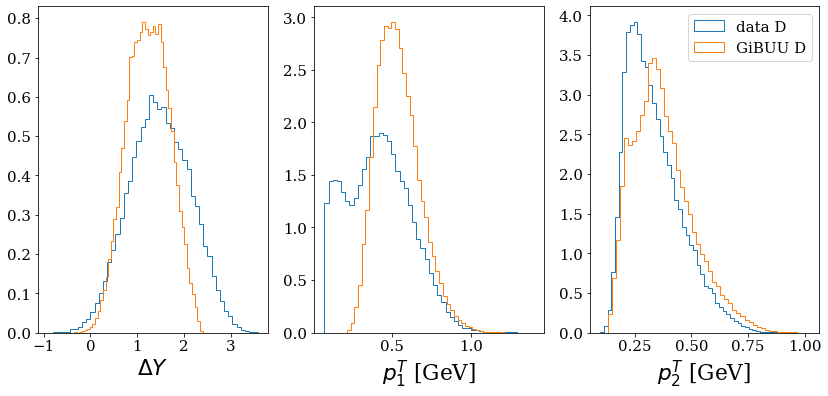

In [123]:
q="h1_pid==211 and h2_pid == -211 and h2_p>0.2 and h1_cm_pt>0.0707 and h2_cm_pt>0.0707 and " +\
        pThetaCuts_pair
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plt.sca(axs[0])

for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).drap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).drap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$\Delta Y$')

plt.sca(axs[1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_1$ [GeV]')


plt.sca(axs[2])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_2$ [GeV]')
plt.legend()
plt.show()

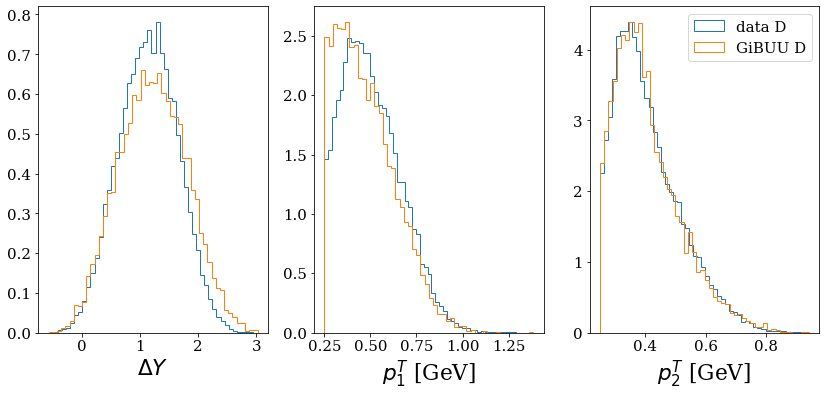

In [366]:
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
#q+=" and h1_p<2.7"
#q+=" and h2_p>0.5"
#q+=" and h1_cm_pt>0.4"
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plt.sca(axs[0])

for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).drap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).drap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$\Delta Y$')

plt.sca(axs[1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_1$ [GeV]')


plt.sca(axs[2])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_2$ [GeV]')
plt.legend()
plt.show()
    

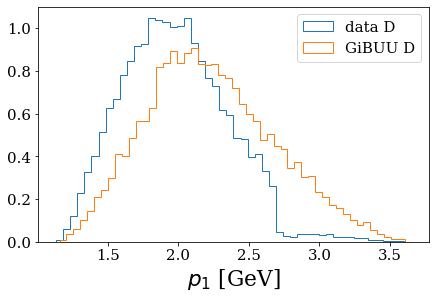

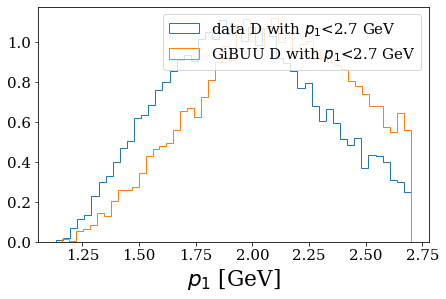

In [367]:
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_p, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h1_p, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p_1$ [GeV]')
plt.legend()
plt.show()

for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7").h1_p, bins=50, density=True,
            label=f'data {a} with $p_1$<2.7 GeV', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7").h1_p, bins=50, density=True,
            label=f'GiBUU {a} with $p_1$<2.7 GeV', histtype='step')
plt.xlabel('$p_1$ [GeV]')
plt.legend()
plt.show()

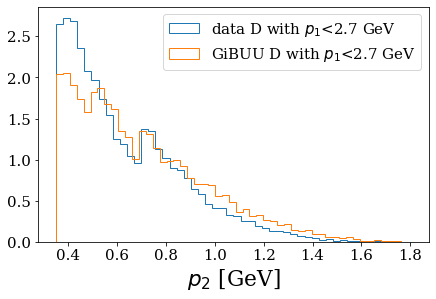

In [369]:
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h2_p, bins=50, density=True,
            label=f'data {a} with $p_1$<2.7 GeV', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h2_p, bins=50, density=True,
            label=f'GiBUU {a} with $p_1$<2.7 GeV', histtype='step')
plt.xlabel('$p_2$ [GeV]')
plt.legend()
plt.show()

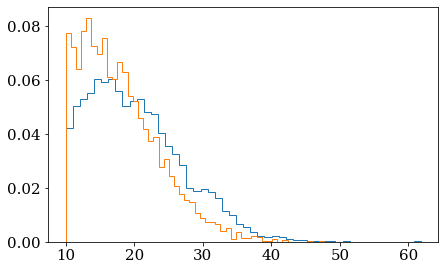

In [370]:
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
#q+=" and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.35"

a = "D"
plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h1_th, bins=50, 
         density=True, histtype='step')
plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h1_th, bins=50, 
         density=True, histtype='step')
plt.show()

In [93]:
len(dfs_pair["GiBUU_D"].query(pThetaCuts_trig.replace("h1_", "h2_")))

0

In [ ]:
dfs_pair["GiBUU_D"].eval("h2_th")

In [ ]:
#check some systematics:
import random
r = random.Random()

for s in 0, .2, .5:
    xx = []
    yy = []
    for sigma_inj in np.linspace(.5, 2, 16):
        sigma_res = 0.02
        nbins=8

        vals = []
        for i in range(10000):
            val = r.gauss(0,sigma_inj*(r.gauss(1, s)))+r.gauss(0,sigma_res)
            while val<-np.pi:
                val += 2*np.pi
            while val>np.pi:
                val -= 2*np.pi
            vals.append(val)
        sigma_actual = np.std(vals)
        y, x = np.histogram(np.abs(vals), bins=np.linspace(0, np.pi, nbins+1))

        x= (x[:-1]+ x[1:])/2
        sigma_extract = np.sqrt(sum(y*x**2)/sum(y))
        xx.append(sigma_actual)
        yy.append(sigma_extract)
    plt.plot(xx, np.subtract(yy,xx), linestyle='-')
#plt.plot((0,1.8), (0,1.8), linestyle='--' )


In [ ]:
help(r.gauss)

In [ ]:
# endcap correction
fig, axs = plt.subplots(4, 1, figsize=(7, 15), sharey='all', sharex='all')
for j,(key, nbins) in enumerate([("all", 1), ("dY", 4), ("pT1", 3), ("pT2", 3)]):
    plt.sca(axs[j])
    print(key)
    
    for i in range(nbins):
        df = all_data[key][i]['D']
        x= df.phi
        dx=x[1]-x[0]
        y = df.C/(df.C-df.C_correction_EC)
        dy = df.dCsyst_EC/df.C
        
        
        if key == 'all':
            label = "combined"
        else:
            label = all_sliceinfo[key][i]
        plt.plot(x, y, label=label)
        
        plt.fill_between(x, y-dy, y+dy, alpha=0.5)
        
        plt.xlabel("$|\Delta\phi|$ [rad]")
        plt.ylabel("$C^{\\rm corr}_D/C^{\\rm obs}_D$")
        
        #print(yDcorr/yD)
        print(np.sqrt(np.mean((yDcorr/yD-1)**2)), fAl*np.sqrt(np.mean(((yC-yFe)/yAl/2)**2)))
    plt.legend()
plt.show()

In [ ]:
# endcap correction
fig, axs = plt.subplots(4, 1, figsize=(7, 15), sharey='all', sharex='all')
for j,(key, nbins) in enumerate([("all", 1), ("drap", 4), ("pT1", 3), ("pT2", 3)]):
    plt.sca(axs[j])
    print(key)
    
    for i in range(nbins):
        yD = all_data[key][('D', 211, i)]['y']
        dyD = all_data[key][('D', 211, i)]['dystat']
        yC = all_data[key][('C', 211, i)]['y']
        dyC = all_data[key][('C', 211, i)]['dystat']
        yFe = all_data[key][('Fe', 211, i)]['y']
        dyFe = all_data[key][('Fe', 211, i)]['dystat']
        x = all_data[key][('Fe', 211, i)]['bins']
        x= (x[:-1]+x[1:])/2
        dx=x[1]-x[0]
        
        fAl = 0.02
        
        #use corrections assuming C(Al) is halfway between C(C) and C(Fe)
        yAl = (yC+yFe)/2
        
        # uncertainty from the stat uncertainty on the Al interpolation, 
        # and also from the interpolation itself
        dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
        yDcorr = (yD-fAl*yAl)
        dyDcorr= fAl*dyAl
        yDcorr/=dx*sum(yDcorr)
        dyDcorr/=dx*sum(yDcorr)
        
        yD/=dx*sum(yD)
        
        if key == 'all':
            label = "combined"
        else:
            d = all_data[key][('D', 211, i)]
            label = f'{d["slice_range"][0]:.2f} < ${d["slicevartex"]}$ < {d["slice_range"][1]:.2f}'
        plt.plot(x, yDcorr/yD, label=label)
        
        plt.fill_between(x, (yDcorr-dyDcorr)/yD, (yDcorr+dyDcorr)/yD, alpha=0.5)
        
        plt.xlabel("$|\Delta\phi|$ [rad]")
        plt.ylabel("$C^{\\rm corr}_D/C^{\\rm obs}_D$")
        
        #print(yDcorr/yD)
        print(np.sqrt(np.mean((yDcorr/yD-1)**2)), fAl*np.sqrt(np.mean(((yC-yFe)/yAl/2)**2)))
    plt.legend()
plt.show()